Assuma um modelo predador-presa de duas espécies, onde a espécie de presa ($ V $) é reabastecida por imigração, e não por reprodução, e a espécie predadora ($ P $) tem sua taxa de natalidade determinada exclusivamente por sua taxa de ingestão de presas. Sendo assim, as equações do modelo podem ser representadas pelo sistema de primeira ordem:

Variação da vítima (vítima V): $ \frac{\partial V}{\partial t} = \theta - a PV $  
Variação do predador (predador P): $ \frac{\partial P}{\partial t} = \epsilon a PV - sP $,  
onde:  
* $ \theta = $ taxa de imigração das presas,  
* $ a = $ eficiência de captura, ou seja, o efeito de um predador sobre o crescimento populacional das presas,  
* $ \epsilon = $ eficiência de conversão de presas consumidas em novos predadores,  
* $ s = $ taxa de mortalidade per capita dos predadores.

Observe que o termo $ \epsilon a V $ é a taxa de crescimento per capita da população de predadores em função da abundância das presas.

Considere:
* $ \theta = 10 $,  
* $ \epsilon = 1 $,
* $ a = 0.1 $.  
E dois valores para a taxa de mortalidade per capita dos predadores:
* $ s = 0.3 $,  
* $ s = 2 $.

Para caso caso, resolva para um período de 40 gerações, no intervalo de tempo $ [0, 40] $, usando o comando `lsode`, e assumindo população inicial de 1 presa e 1 predador ($ V(0) = 1 $ e $ P(0) = 1 $). Para cada taxa de mortalidade dos predadores, mostre em um mesmo gráfico o tamanho das populações e faça uma análise suscinta dos resultados obtidos, observando o comportamento das populações em torno dos pontos de equilı́brio com relação ao tempo.


In [15]:
graphics_toolkit ("gnuplot");

Iniciando variáveis pré-definidas

In [16]:
theta = 10;
epsilon = 1;
a = 0.1;
P_0 = 1;
V_0 = 1;

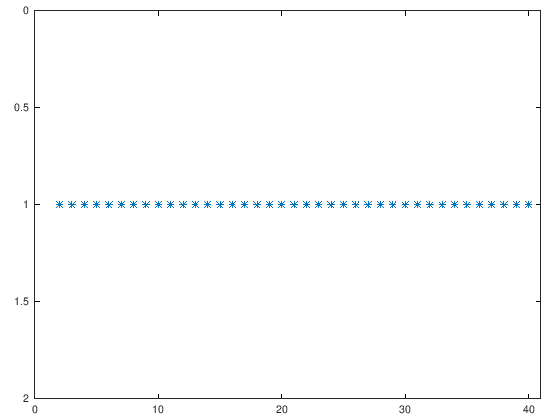

In [17]:
t = linspace(0,40,40);
spy(t)

Botando as funções em forma vetorial:

In [18]:
function xdot = f (v, t)
    xdot = [  ]
endfunction

In [19]:
function xdot = f (v, t)
    xdot = epsilon * a * V * P - s * P
endfunction